In [2]:


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
df=pd.read_excel('/content/diabetes.xlsx')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:

# Confirming df is without outliers
num_var = df.select_dtypes(exclude='object')
for i in num_var:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    UL = q3 + 1.5 * IQR
    LL = q1 - 1.5 * IQR
    print('Number of Outliers in dataset df3', i, ' = ', (df.shape[0] - df[(df[i] < UL) | (df[i] > LL)].shape[0]))
    print(' ')

Number of Outliers in dataset df3 Pregnancies  =  0
 
Number of Outliers in dataset df3 Glucose  =  0
 
Number of Outliers in dataset df3 BloodPressure  =  0
 
Number of Outliers in dataset df3 SkinThickness  =  0
 
Number of Outliers in dataset df3 Insulin  =  0
 
Number of Outliers in dataset df3 BMI  =  0
 
Number of Outliers in dataset df3 DiabetesPedigreeFunction  =  0
 
Number of Outliers in dataset df3 Age  =  0
 
Number of Outliers in dataset df3 Outcome  =  0
 


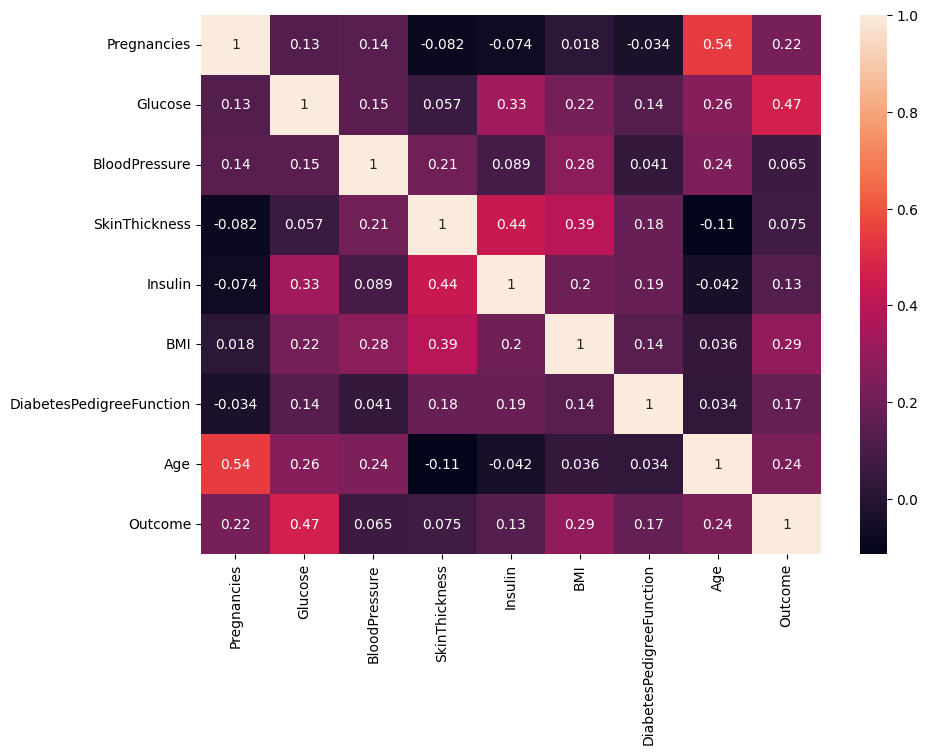

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

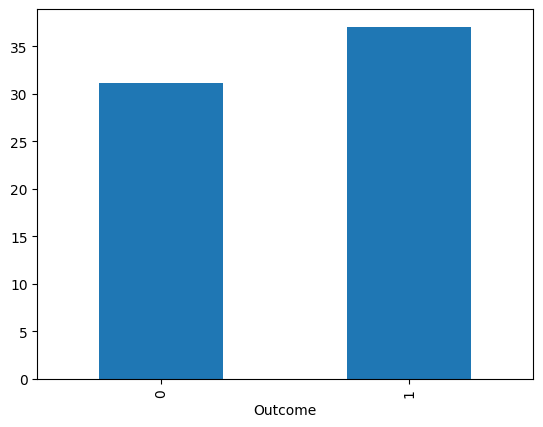

In [14]:
df.groupby('Outcome')['Age'].mean().plot(kind='bar')
plt.show()


In [18]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


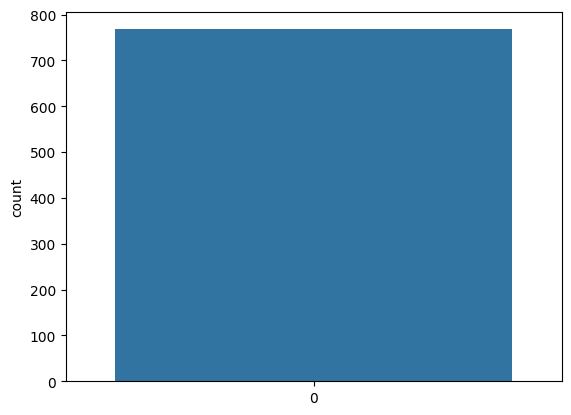

In [20]:

print((df['Outcome'].value_counts()/df['Outcome'].shape)*100)
sns.countplot(df['Outcome'])
plt.show()

In [21]:
print((df['Outcome'].value_counts()/df['Outcome'].shape)*100)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


In [22]:
print('Before OverSampling, the shape of train_x: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_x: (614, 8)
Before OverSampling, the shape of train_y: (614,) 



In [23]:
print('Before OverSampling, the shape of train_x: {}'.format(x_test.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_test.shape))

Before OverSampling, the shape of train_x: (154, 8)
Before OverSampling, the shape of train_y: (154,) 



In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(sampling_strategy='minority')
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [27]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))


After OverSampling, the shape of train_X: (802, 8)
After OverSampling, the shape of train_y: (802,) 



In [29]:
print('After OverSampling, the shape of train_X: {}'.format(x_test.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_test.shape))

After OverSampling, the shape of train_X: (154, 8)
After OverSampling, the shape of train_y: (154,) 



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(x_train_sm, y_train_sm)
y_pred = logistic.predict(x_test)
acc_1=accuracy_score(y_test, y_pred)
accuracy1=round(acc_1*100,2)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print("Accuracy :", accuracy1)

Confusion Matrix : 
 [[68 31]
 [16 39]]
Accuracy : 69.48


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154

The accuracy score of logistic regression is 69.48%
